In [21]:
from datasets.local_dataset import Commit_guru

dataset = Commit_guru(filename='test.csv')


In [5]:
for x,y in dataset:
    pass

In [6]:
x, y = next(iter(dataset))
x

{'fix': False,
 'ns': 2.0,
 'nd': 4.0,
 'nf': 6.0,
 'entropy': 2.192380602,
 'la': 12.0,
 'ld': 16.0,
 'lt': 683.0,
 'ndev': 15.0,
 'age': 201.1908353,
 'nuc': 4.0,
 'exp': 4.0,
 'rexp': 2.056891026,
 'sexp': 2.0}

In [7]:
y

False

In [8]:
from river import linear_model
model = linear_model.LogisticRegression()
model.predict_proba_one(x)

{False: 0.5, True: 0.5}

In [9]:
model =  model.learn_one(x,y)

In [10]:
model.predict_proba_one(x)

{False: 1.0, True: 0}

In [11]:
model.predict_one(x)

False

In [12]:
from river import metrics
model = linear_model.LogisticRegression()
metric = metrics.ROCAUC()
for x,y in dataset:
    y_pred = model.predict_proba_one(x)
    model.learn_one(x,y)
    metric.update(y,y_pred)
metric


ROCAUC: 63.18%

In [13]:
from river import compose
from river import preprocessing

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)
model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  LogisticRegression (
    optimizer=SGD (
      lr=Constant (
        learning_rate=0.01
      )
    )
    loss=Log (
      weight_pos=1.
      weight_neg=1.
    )
    l2=0.
    l1=0.
    intercept_init=0.
    intercept_lr=Constant (
      learning_rate=0.01
    )
    clip_gradient=1e+12
    initializer=Zeros ()
  )
)

In [14]:
metric = metrics.ROCAUC()
from river import evaluate
evaluate.progressive_val_score(dataset,model,metric)

ROCAUC: 72.90%

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [17]:
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8,0.05,1000)
dist_b = random_state.normal(0.4,0.02,1000)
dist_c = random_state.normal(0.6,0.1,1000)

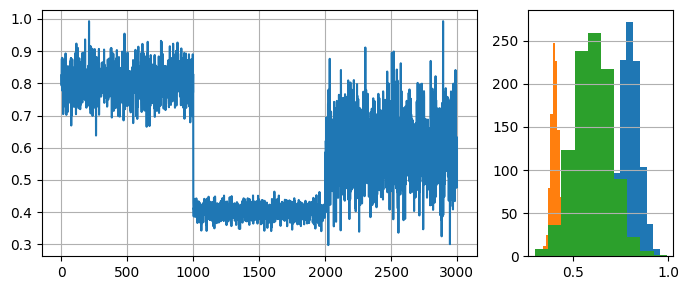

In [18]:
stream = np.concatenate((dist_a,dist_b,dist_c))
# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)

Change detected at index 1055
Change detected at index 2079


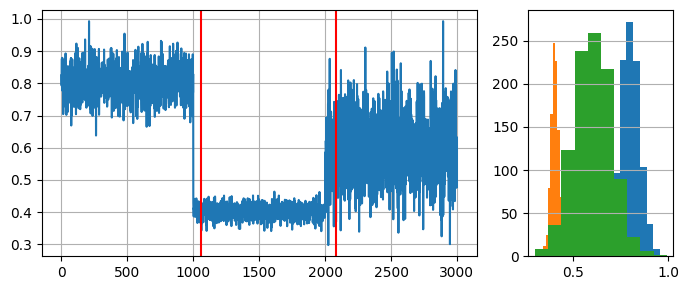

In [19]:
from river import drift
drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)
    if drift_detector.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)
        
plot_data(dist_a,dist_b,dist_c,drifts)

In [20]:
# from river import datasets
# dataset = datasets.ImageSegments()
# dataset

Image segments classification.

This dataset contains features that describe image segments into 7 classes: brickface, sky,
foliage, cement, window, path, and grass.

    Name  ImageSegments                                                                                            
    Task  Multi-class classification                                                                               
 Samples  2,310                                                                                                    
Features  18                                                                                                       
  Sparse  False                                                                                                    
    Path  C:\Users\KalifaRyu\miniconda3\envs\real-world-evaluation\lib\site-packages\river\datasets\segment.csv.zip

In [21]:
for x,y in dataset:
    pass

In [22]:
x,y = next(iter(dataset))

In [23]:
x

{'region-centroid-col': 218,
 'region-centroid-row': 178,
 'short-line-density-5': 0.11111111,
 'short-line-density-2': 0.0,
 'vedge-mean': 0.8333326999999999,
 'vegde-sd': 0.54772234,
 'hedge-mean': 1.1111094,
 'hedge-sd': 0.5443307,
 'intensity-mean': 59.629630000000006,
 'rawred-mean': 52.44444300000001,
 'rawblue-mean': 75.22222,
 'rawgreen-mean': 51.22222,
 'exred-mean': -21.555555,
 'exblue-mean': 46.77778,
 'exgreen-mean': -25.222220999999998,
 'value-mean': 75.22222,
 'saturation-mean': 0.31899637,
 'hue-mean': -2.0405545}

In [25]:
y

'path'

In [23]:
from river import tree
model = tree.HoeffdingTreeClassifier()
model.predict_proba_one(x)

{}

In [24]:
print(model.predict_one(x))

None


In [25]:
model.learn_one(x,y)
model.predict_proba_one(x)

{False: 1.0}

In [27]:
from river import metrics

model = tree.HoeffdingTreeClassifier()

metric = metrics.ClassificationReport()

for x, y in dataset:
    y_pred = model.predict_one(x)
    model.learn_one(x,y)
    if y_pred is not None:
        metric.update(y,y_pred)
        print(metric)
        


           Precision   Recall    F1        Support  
                                                    
   False     100.00%   100.00%   100.00%         1  
                                                    
   Macro     100.00%   100.00%   100.00%            
   Micro     100.00%   100.00%   100.00%            
Weighted     100.00%   100.00%   100.00%            

                  100.00% accuracy                  
           Precision   Recall    F1        Support  
                                                    
   False     100.00%   100.00%   100.00%         2  
                                                    
   Macro     100.00%   100.00%   100.00%            
   Micro     100.00%   100.00%   100.00%            
Weighted     100.00%   100.00%   100.00%            

                  100.00% accuracy                  
           Precision   Recall    F1        Support  
                                                    
   False     100.00%   100.00%   100.00%    

           Precision   Recall    F1       Support  
                                                   
   False      83.39%   100.00%   90.94%       939  
    True       0.00%     0.00%    0.00%       187  
                                                   
   Macro      41.70%    50.00%   45.47%            
   Micro      83.39%    83.39%   83.39%            
Weighted      69.54%    83.39%   75.84%            

                  83.39% accuracy                  
           Precision   Recall    F1       Support  
                                                   
   False      83.41%   100.00%   90.95%       940  
    True       0.00%     0.00%    0.00%       187  
                                                   
   Macro      41.70%    50.00%   45.48%            
   Micro      83.41%    83.41%   83.41%            
Weighted      69.57%    83.41%   75.86%            

                  83.41% accuracy                  
           Precision   Recall    F1       Support  
          

           Precision   Recall    F1       Support  
                                                   
   False      76.11%   100.00%   86.44%      1676  
    True       0.00%     0.00%    0.00%       526  
                                                   
   Macro      38.06%    50.00%   43.22%            
   Micro      76.11%    76.11%   76.11%            
Weighted      57.93%    76.11%   65.79%            

                  76.11% accuracy                  
           Precision   Recall    F1       Support  
                                                   
   False      76.12%   100.00%   86.44%      1677  
    True       0.00%     0.00%    0.00%       526  
                                                   
   Macro      38.06%    50.00%   43.22%            
   Micro      76.12%    76.12%   76.12%            
Weighted      57.95%    76.12%   65.80%            

                  76.12% accuracy                  
           Precision   Recall    F1       Support  
          

           Precision   Recall   F1       Support  
                                                  
   False      74.13%   97.71%   84.30%      2223  
    True      68.90%   12.97%   21.84%       871  
                                                  
   Macro      71.52%   55.34%   53.07%            
   Micro      73.85%   73.85%   73.85%            
Weighted      72.66%   73.85%   66.72%            

                 73.85% accuracy                  
           Precision   Recall   F1       Support  
                                                  
   False      74.14%   97.71%   84.31%      2224  
    True      68.90%   12.97%   21.84%       871  
                                                  
   Macro      71.52%   55.34%   53.07%            
   Micro      73.86%   73.86%   73.86%            
Weighted      72.66%   73.86%   66.73%            

                 73.86% accuracy                  
           Precision   Recall   F1       Support  
                             

In [28]:
metric

           Precision   Recall   F1       Support  
                                                  
   False      73.52%   96.97%   83.63%      2506  
    True      70.54%   17.22%   27.68%      1057  
                                                  
   Macro      72.03%   57.09%   55.66%            
   Micro      73.31%   73.31%   73.31%            
Weighted      72.64%   73.31%   67.04%            

                 73.31% accuracy                  

In [29]:
from river import evaluate

model = tree.HoeffdingTreeClassifier()
metric = metrics.ClassificationReport()

evaluate.progressive_val_score(dataset, model, metric)

           Precision   Recall   F1       Support  
                                                  
   False      73.52%   96.97%   83.63%      2506  
    True      70.54%   17.22%   27.68%      1057  
                                                  
   Macro      72.03%   57.09%   55.66%            
   Micro      73.31%   73.31%   73.31%            
Weighted      72.64%   73.31%   67.04%            

                 73.31% accuracy                  